# Activity 3 (Wednesday)

- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read the data

In [12]:
c_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv') # read in the cleaned data from Nelson

0            central
1        west region
2               east
3         north west
4         north west
            ...     
10684        central
10685     north west
10686        central
10687    west region
10688    west region
Name: region, Length: 10689, dtype: object

In [14]:
c_df.select_dtypes(include=np.number).columns.tolist() # fields

['Unnamed: 0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [15]:
c_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True) # drop the unnamed field

In [16]:
numericals_df   = c_df.select_dtypes(include=np.number) # get numerical columns using the select_dtypes method
categoricals_df = c_df.select_dtypes(include=object)    # get cat columns

In [19]:
c_df.gender.value_counts()

f    5469
m    5220
Name: gender, dtype: int64

In [23]:
c_df.education.value_counts()

bachelor                3210
college                 3141
high school or below    3076
master                   873
doctor                   389
Name: education, dtype: int64

In [7]:
c_df['customer_lifetime_value'].sort_values()

6759     1898
1290     1898
9324     1904
7976     1918
3151     1918
        ...  
6724    66025
8898    67907
1137    73225
77      74228
7809    83325
Name: customer_lifetime_value, Length: 10689, dtype: int64

## Analysis of Numerical features

### Visualizations

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

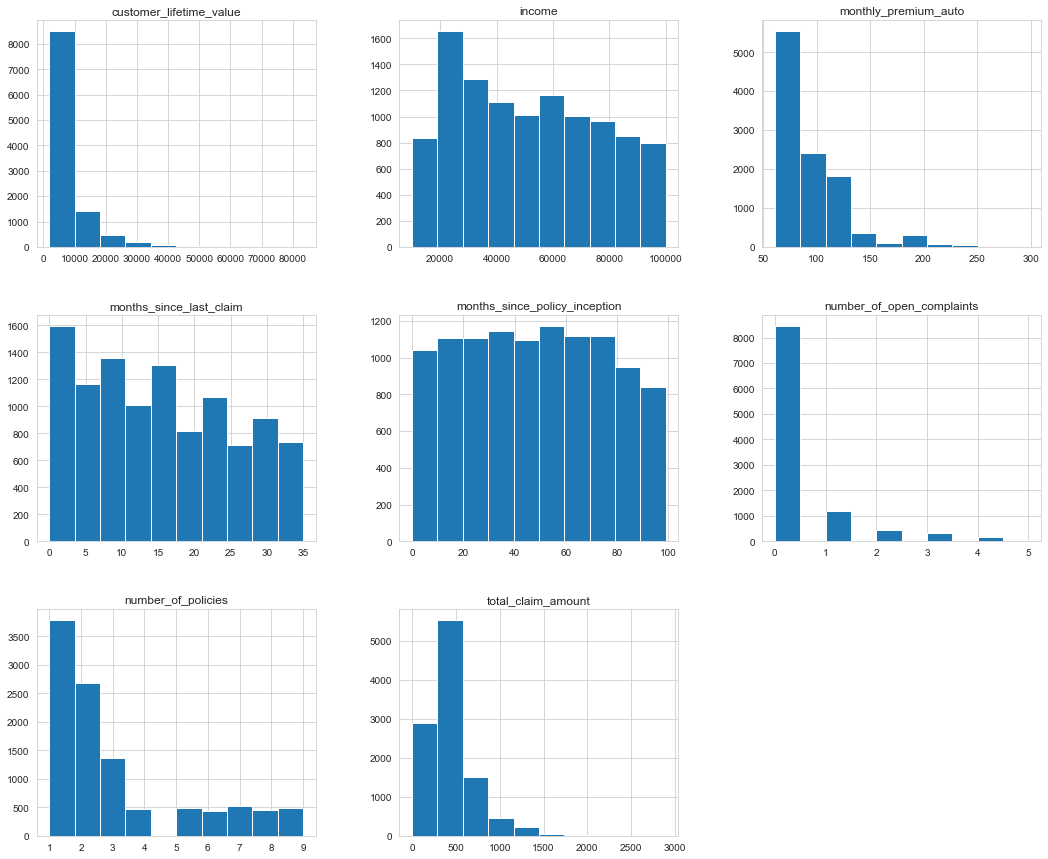

In [6]:
numericals_df.hist(figsize=(18,15)) # make histograms

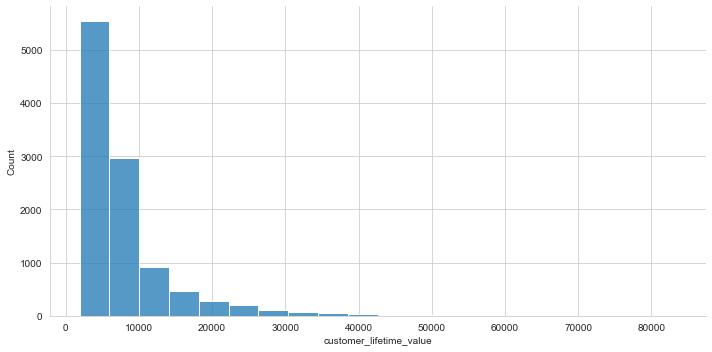

In [7]:
sns.displot(numericals_df['customer_lifetime_value'], bins=20,aspect=2)

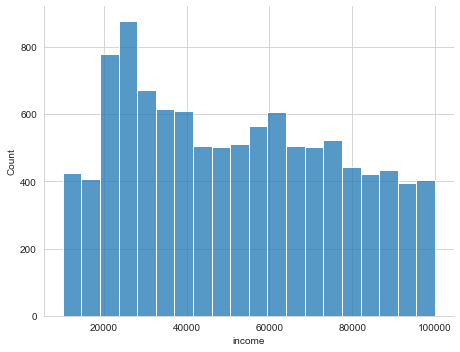

In [8]:
sns.displot(numericals_df['income'], bins=20, aspect=1.3)

<i> the number_of_open_complaints and number_of_policies fields are discrete so we remove them below

In [10]:
numericals_df = numericals_df.drop(columns=['number_of_open_complaints','number_of_policies'],axis=1)

### Plot the distribution functions

In [ ]:
n_data = [x for x in numericals_df.columns] # list of columns

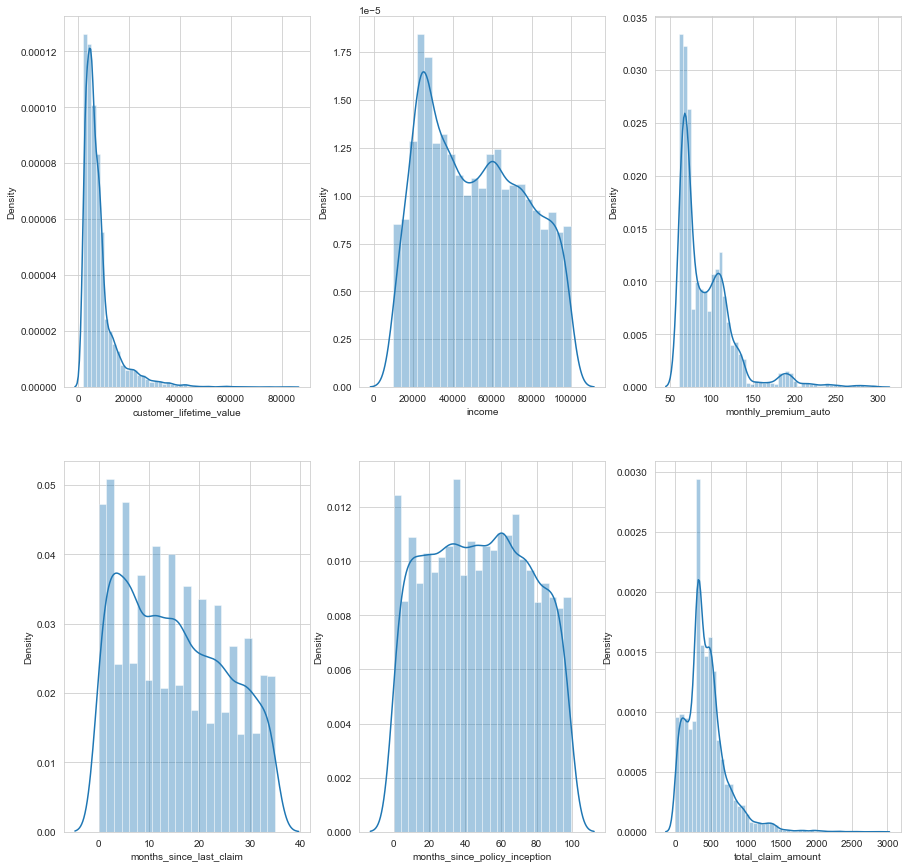

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(15,15))

for i, ax in zip(range(6), axes.flat):
    sns.distplot(c_df[n_data[i]], ax=ax, kde=True)
plt.show()

<AxesSubplot:ylabel='Density'>

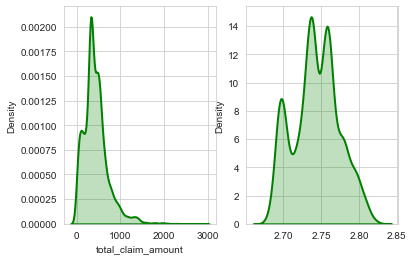

In [17]:
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(numericals_df['customer_lifetime_value'])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numericals_df['total_claim_amount'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

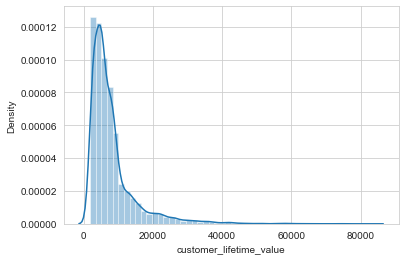

In [18]:
sns.distplot(numericals_df['customer_lifetime_value'])

<AxesSubplot:ylabel='Density'>

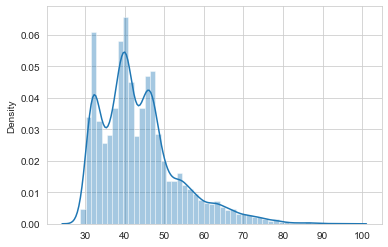

In [19]:
cust_lifetime_boxcox = boxcox(numericals_df['customer_lifetime_value'],lmbda=.3)
sns.distplot(cust_lifetime_boxcox)

### Correlations

In [22]:
numericals_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
customer_lifetime_value,1.000000,-0.000276,0.404235,0.012466,0.017055,0.232849
income,-0.000276,1.000000,-0.010804,-0.018013,0.011509,-0.118201
monthly_premium_auto,0.404235,-0.010804,1.000000,0.006959,0.019696,0.630149
months_since_last_claim,0.012466,-0.018013,0.006959,1.000000,-0.036883,0.008979
months_since_policy_inception,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004186
total_claim_amount,0.232849,-0.118201,0.630149,0.008979,0.004186,1.000000


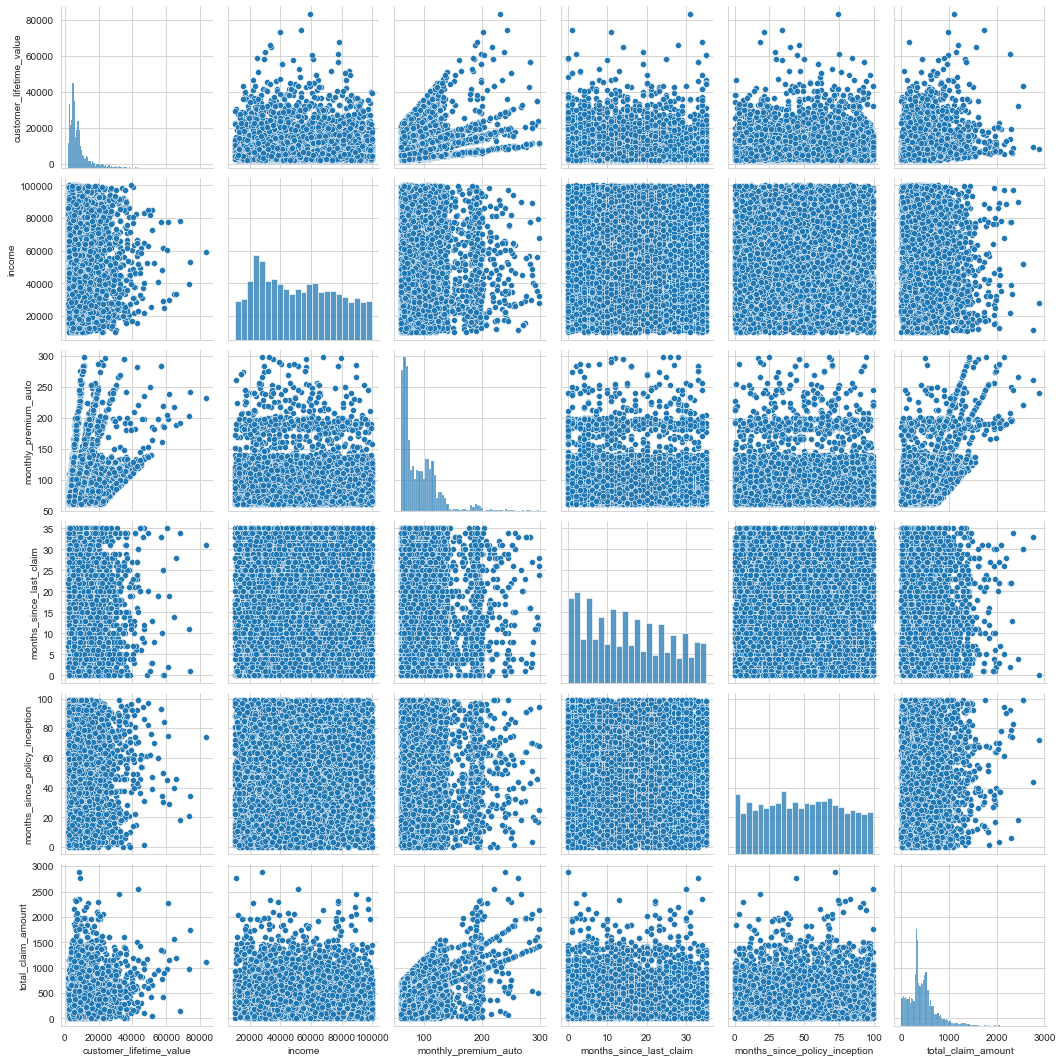

In [23]:
sns.pairplot(numericals_df)

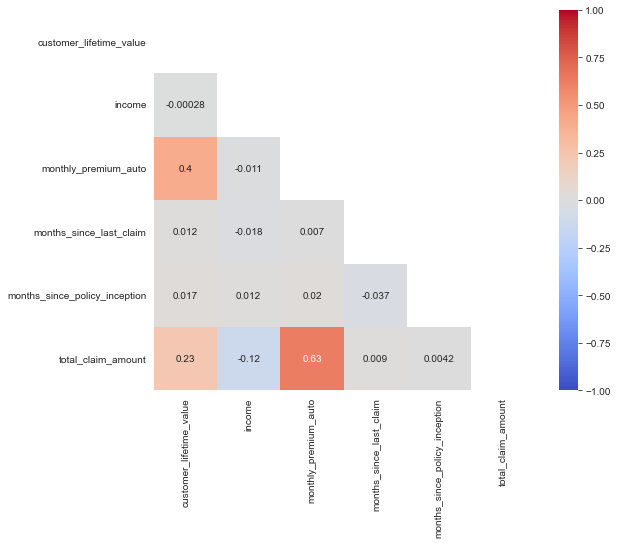

In [24]:
n_corr = numericals_df.corr()
mask = np.zeros_like(n_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(n_corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

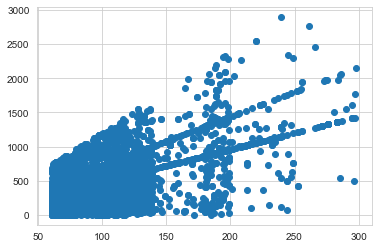

In [25]:
plt.scatter(x=numericals_df['monthly_premium_auto'], y=numericals_df['total_claim_amount'])
plt.show()

In [26]:
numericals_df['monthly_premium_auto']

0         61
1         64
2        100
3         97
4        117
        ... 
10684    253
10685     65
10686    201
10687    158
10688    101
Name: monthly_premium_auto, Length: 10689, dtype: int64

#### Observations
- There doesn't seem to be much multicolinearity in the data
- Intuitively I'd expect correlation between total_claim_amount and monthly_premium_auto and this is reflected in the data. To some extent customer_lifetime_value is correlated with monthly_premium_auto and total_claim_amount as well. The months_since_last_claim and monthly_premium_auto I'd expect to be anticorrelated.


In [32]:
numericals_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,4809,48029,61,7,52,292
1,2228,26794,64,3,26,744
2,14947,22139,100,34,31,480
3,22332,49078,97,10,3,484
4,9025,23675,117,15,31,707
...,...,...,...,...,...,...
10684,15563,64811,253,8,40,1214
10685,5259,61146,65,7,68,273
10686,23893,39837,201,11,63,381
10687,11971,64195,158,0,27,618


In [68]:
policy_cvg_counts_df = c_df.groupby(['customer_lifetime_value'])['policy'].count().rename('policy_count').reset_index()
policy_cvg_counts_df

,customer_lifetime_value,policy_count
0,1898,2
1,1904,1
2,1918,2
3,1940,1
4,1994,1
...,...,...
5671,66025,1
5672,67907,1
5673,73225,1
5674,74228,1


#### Highly Correlated Columns

In [38]:
corr_abs      = n_corr.abs()
upper_triangle =corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

[]

## Categorical feature analysis

In [42]:
categoricals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [44]:
policy_cvg_counts_df = categoricals_df.groupby(['policy_type',\
                                                'coverage'])['policy'].count().rename('count').reset_index()


In [67]:
loc_vhclass_respcounts_df = categoricals_df[categoricals_df['response']=='yes'].groupby(['location_code','vehicle_class'])['response'].count().rename('num_responses').reset_index()
loc_vhclass_respcounts_df

,location_code,vehicle_class,num responses
0,rural,four-door car,91
1,rural,luxury car,1
2,rural,sports car,20
3,rural,suv,19
4,rural,two-door car,37
5,suburban,four-door car,481
6,suburban,luxury car,13
7,suburban,luxury suv,31
8,suburban,sports car,62
9,suburban,suv,248


0         no
1         no
2         no
3        yes
4         no
        ... 
10684     no
10685     no
10686     no
10687     no
10688     no
Name: response, Length: 10689, dtype: object

<AxesSubplot:title={'center':'Coverage count by policy type'}, xlabel='policy_type', ylabel='count'>

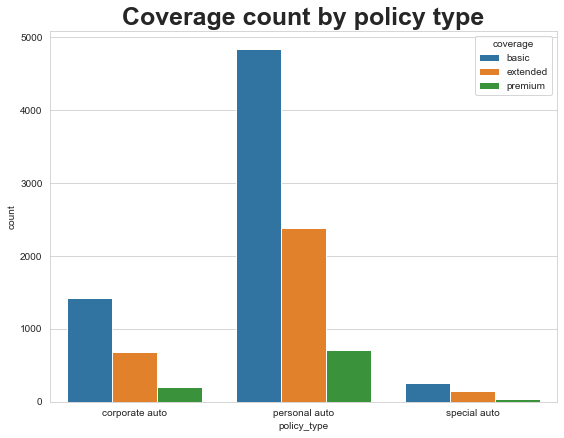

In [64]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Coverage count by policy type', size='25', fontweight='bold')

sns.barplot(x = policy_cvg_counts_df['policy_type'],y = policy_cvg_counts_df['count'], hue = policy_cvg_counts_df['coverage'])

<AxesSubplot:title={'center':'Response by vehicle class'}, xlabel='location_code', ylabel='response'>

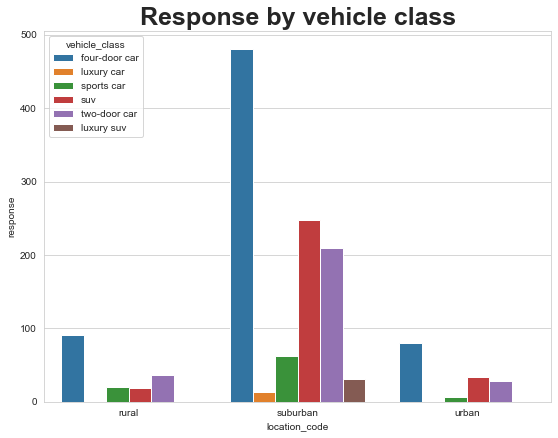

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by vehicle class', size='25', fontweight='bold')

sns.barplot(x = loc_vhclass_respcounts_df['location_code'],y = loc_vhclass_respcounts_df['response'], hue = loc_vhclass_respcounts_df['vehicle_class'])

In [71]:
#sns.catplot(data=categoricals_df, kind="swarm", x="location_code", y="response", hue="vehicle_class")


# Activity 4   (Thursday)

-    Show a plot of the total number of responses.
-    Show a plot of the response by the sales channel.
-    Show a plot of the response by the total claim amount.
-    Show a plot of the response by income.
    (Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
-    Plot the Correlation Heatmap.
-    Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.


In [72]:
!pwd

/Users/antares/PycharmProjects/ih_labs_pc/IH_labs/ihL08_06_22/Customer_Analysis_Case_Study


In [73]:
c_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv') # read in the cleaned data from Nelson

In [74]:
c_df.columns


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')